## Data load

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

data = pd.read_csv("~/aiffel/netflix/data/netflix_titles.csv")
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


#### 12개의 feature로 구성된 netflix dataset
- show_id : Unique ID for every Movie / Tv Show (모든 영화/TV 프로그램의 고유 ID)
- type : Identifier - A Movie or TV Show (식별자 - 영화 또는 TV 프로그램)
- title : Title of the Movie / Tv Show (영화/TV 쇼의 제목)
- director : Director of the Movie (영화 감독)
- cast : Actors involved in the movie / show (영화/쇼에 참여한 배우들)
- country : Country where the movie / show was produced (영화/쇼가 제작된 국가)
- data_added : Date it was added on Netflix (넷플릭스에 추가된 날짜)
- release_year : Actual Release year of the movie / show (영화/쇼 실제 공개 연도)
- rating : TV Rating of the movie / show (영화/쇼의 시청 등급)
- duration : Total Duration - in minutes or number of seasons (총 기간 - 분 또는 시즌 수)
- listed_in : Genere (장르)
- description : The summary description (요약 설명)

## Null data check

In [2]:
for col in data.columns:
    msg = 'column : {:>10}\t Percent of NaN value : {:.2f}%'.format(col, 100 * (data[col].isnull().sum() / data[col].shape[0]))
    print(msg)

column :    show_id	 Percent of NaN value : 0.00%
column :       type	 Percent of NaN value : 0.00%
column :      title	 Percent of NaN value : 0.00%
column :   director	 Percent of NaN value : 29.91%
column :       cast	 Percent of NaN value : 9.37%
column :    country	 Percent of NaN value : 9.44%
column : date_added	 Percent of NaN value : 0.11%
column : release_year	 Percent of NaN value : 0.00%
column :     rating	 Percent of NaN value : 0.05%
column :   duration	 Percent of NaN value : 0.03%
column :  listed_in	 Percent of NaN value : 0.00%
column : description	 Percent of NaN value : 0.00%


- 가장 많은 null data를 가진 칼럼 : director(29.91%)
- cast, country 각각 약 9.4%
- 그 외 date_added, rating, duration

In [3]:
# import missingno as msno           

# # 결측데이터들을 직관적으로 파악하는데 좋은 패키지

# msno.matrix(df=data.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2)) # 흰 부분이 결측치
# # 미싱노 라이브러리 사용
# # [:,:] 다 가져오겠다. 1로 2로 막 바꿔보셈
# # iloc 인덱싱하는거
# # null 데이터의 분포, 위치를 보고싶을때,

In [4]:
# msno.bar(df=data.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))

## Exploratory data analysis

### type : A Movie vs TV Show

In [5]:
df_type = data['type'].value_counts()
df_type

Movie      6131
TV Show    2676
Name: type, dtype: int64

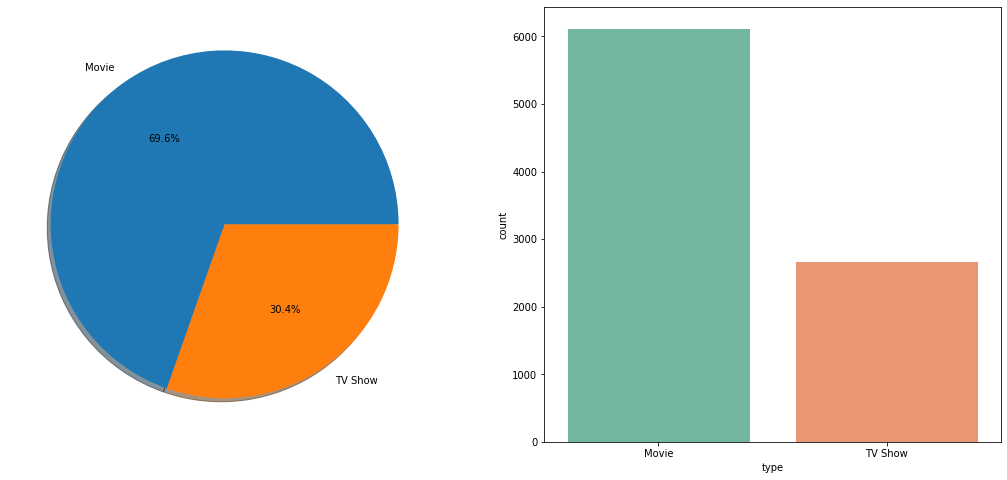

In [6]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))

df_type.plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True)
# ax[0].set_title('Pie plot - Movie / tv show')
ax[0].set_ylabel('')
sns.set(style="darkgrid")
ax = sns.countplot(x = "type", data=data, palette="Set2", ax=ax[1])
# ax[1].set_title('Count plot - movie / tv show')

plt.show()

- movie : tv show = 7 : 3 비율로 나눠진다
- movie와 tv show별 결측치를 확인해보자

In [7]:
# type(Movie, TV show)
data_movie = data.loc[data.type == 'Movie']
data_tv = data.loc[data.type == 'TV Show']

# # 결측치 수 확인
# print('original_data :')
# print(data.isnull().sum())

# print('\ndata_movie :')
# print(data_movie.isnull().sum())

# print('\ndata_tv :')
# print(data_tv.isnull().sum())

In [8]:
print('original_data :')
for col in data.columns:
    msg = 'column : {:>10}\t Percent of NaN value : {:.2f}%'.format(col, 100 * (data[col].isnull().sum() / data[col].shape[0]))
    print(msg)
    
print('\ndata_movie :')    
for col in data_movie.columns:    
    msg_movie = 'column : {:>10}\t Percent of NaN value : {:.2f}%'.format(col, 100 * (data_movie[col].isnull().sum() / data_movie[col].shape[0])) 
    print(msg_movie)
    
print('\ndata_tv :')    
for col in data_tv.columns:    
    msg_tv = 'column : {:>10}\t Percent of NaN value : {:.2f}%'.format(col, 100 * (data_tv[col].isnull().sum() / data_tv[col].shape[0]))
    print(msg_tv)

original_data :
column :    show_id	 Percent of NaN value : 0.00%
column :       type	 Percent of NaN value : 0.00%
column :      title	 Percent of NaN value : 0.00%
column :   director	 Percent of NaN value : 29.91%
column :       cast	 Percent of NaN value : 9.37%
column :    country	 Percent of NaN value : 9.44%
column : date_added	 Percent of NaN value : 0.11%
column : release_year	 Percent of NaN value : 0.00%
column :     rating	 Percent of NaN value : 0.05%
column :   duration	 Percent of NaN value : 0.03%
column :  listed_in	 Percent of NaN value : 0.00%
column : description	 Percent of NaN value : 0.00%

data_movie :
column :    show_id	 Percent of NaN value : 0.00%
column :       type	 Percent of NaN value : 0.00%
column :      title	 Percent of NaN value : 0.00%
column :   director	 Percent of NaN value : 3.07%
column :       cast	 Percent of NaN value : 7.75%
column :    country	 Percent of NaN value : 7.18%
column : date_added	 Percent of NaN value : 0.00%
column : release

전체 데이터의 director null 값 30% 중 tv show가 91% 를 차지한다 
- tv show의 경우 director가 의미없음
- 상대적으로 tv가 movie보다 null data가 더 많다

### duration : minutes or number of seasons

In [62]:
df_duration = data['duration'].value_counts()
df_duration

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

- movie -> min
- tv show -> season

In [63]:
# movie / tv 분리
netflix_movies=data[data['type']=='Movie']
netflix_shows=data[data['type']=='TV Show']

#### movie duration

In [64]:
netflix_movies.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


In [65]:
# movie - null data check
netflix_movies['duration'].isnull().sum()

3

In [82]:
netflix_movies[netflix_movies["duration"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


- 결측치 데이터 확인해 보니까 duration값이 rating에 잘못 입력된 것으로 추정 (-min 은 duration값이다)
- 5541, 5791, 5813 번 -> rating data값을 duration값으로 넣어보자

In [94]:
netflix_movies["rating"].replace(["74 min","84 min","66 min"], "", inplace = True)

In [95]:
netflix_movies.loc[[5541,5794,5813],"duration"]=["74 min","84 min","66 min"]

In [96]:
netflix_movies[netflix_movies["rating"].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [45]:
# duration null 값 제거
duration_drop = netflix_movies.dropna(subset=['duration'])
duration_drop['duration'].isnull().sum()

0

In [37]:
# movie duration data를 categorical -> numerical data로 
duration_drop['duration']=duration_drop['duration'].str.replace(' min','')
duration_drop['duration']=duration_drop['duration'].astype(str).astype(int)
duration_drop['duration']

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6128, dtype: int64

In [46]:
# movie_duration value count
dur_value = duration_drop['duration'].value_counts()
dur_value

90 min     152
94 min     146
93 min     146
97 min     146
91 min     144
          ... 
212 min      1
8 min        1
186 min      1
193 min      1
191 min      1
Name: duration, Length: 205, dtype: int64

<AxesSubplot:xlabel='duration', ylabel='Density'>

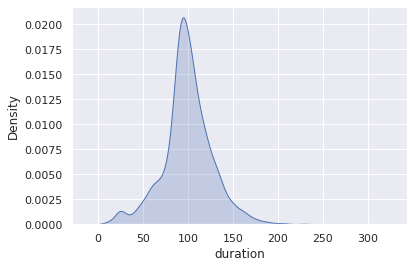

In [38]:
# movie duration (running time) 시각화
sns.set(style="darkgrid")
sns.kdeplot(data=duration_drop['duration'], shade=True)

- movie 컨텐츠 중 가장 많은 running time은 90분 전후임을 확인

#### tv_show duration

In [49]:
netflix_shows.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


In [50]:
# movie - null data check
netflix_shows['duration'].isnull().sum()

0

In [55]:
# # movie duration data를 categorical -> numerical data로 
# netflix_shows['duration']=netflix_shows['duration'].str.replace(' Season','')
# netflix_shows['duration']=netflix_shows['duration'].str.replace(' Seasons','')
# netflix_shows['duration']=netflix_shows['duration'].astype(str).astype(int)
# netflix_shows['duration']

ValueError: invalid literal for int() with base 10: '2s'

In [58]:
netflix_shows.iat['2s']

ValueError: iAt based indexing can only have integer indexers

### listed_in : Genere

In [10]:
data['listed_in'].value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

- 장르가 여러 종류 합쳐져 있으므로 나눠서 저장하자

In [11]:
def split_multi_data_in_col(df, name_col, str_split):
    num_df = len(df)
    result_df = df.drop(index=df.index)
    for idx in range(num_df):
        row = df.iloc[idx]
        keys = row.index
        vals = [[val]for val in row.values]
        dic_row = dict(zip(keys, vals))

        val_col = row[name_col]
        if type(row[name_col]) != str:
            df_row = pd.DataFrame(dic_row)
            result_df = pd.concat([result_df, df_row])
        else:
            val_col = row[name_col].split(str_split)
            for val in val_col:
                dic_row[name_col] = val
                df_row = pd.DataFrame(dic_row)
                result_df = pd.concat([result_df, df_row])
    return result_df.reset_index().drop('index', axis=1)

In [12]:
data_titles_genre_split = split_multi_data_in_col(data, 'listed_in', ', ')

In [13]:
data_titles_genre_split

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...
...,...,...,...,...,...,...,...,...,...,...,...,...
19318,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero..."
19319,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,Comedies,"Dragged from civilian life, a former superhero..."
19320,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
19321,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


데이터 row가 19323으로 늘어났다

In [14]:
# type + duration 새로운 데이터프레임 생성
type_dur_genre = data_titles_genre_split[['type', 'duration', 'listed_in']]

In [15]:
# movie / tv
movie_dur_genre = type_dur_genre.loc[type_dur_genre.type == 'Movie']
tv_dur_genre = type_dur_genre.loc[type_dur_genre.type == 'TV Show']

In [16]:
movie_dur_genre

,type,duration,listed_in
0,Movie,90 min,Documentaries
15,Movie,91 min,Children & Family Movies
16,Movie,125 min,Dramas
17,Movie,125 min,Independent Movies
18,Movie,125 min,International Movies
...,...,...,...
19318,Movie,88 min,Children & Family Movies
19319,Movie,88 min,Comedies
19320,Movie,111 min,Dramas
19321,Movie,111 min,International Movies


In [17]:
tv_dur_genre

,type,duration,listed_in
1,TV Show,2 Seasons,International TV Shows
2,TV Show,2 Seasons,TV Dramas
3,TV Show,2 Seasons,TV Mysteries
4,TV Show,1 Season,Crime TV Shows
5,TV Show,1 Season,International TV Shows
...,...,...,...
19305,TV Show,1 Season,Romantic TV Shows
19306,TV Show,1 Season,TV Dramas
19313,TV Show,2 Seasons,Kids' TV
19314,TV Show,2 Seasons,Korean TV Shows


In [18]:
# movie 장르별 컨텐츠 수
movie_gen = movie_dur_genre['listed_in'].value_counts()
movie_gen

International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Anime Features                71
Cult Movies                   71
Faith & Spirituality          65
Movies                        57
Name: listed_in, dtype: int64

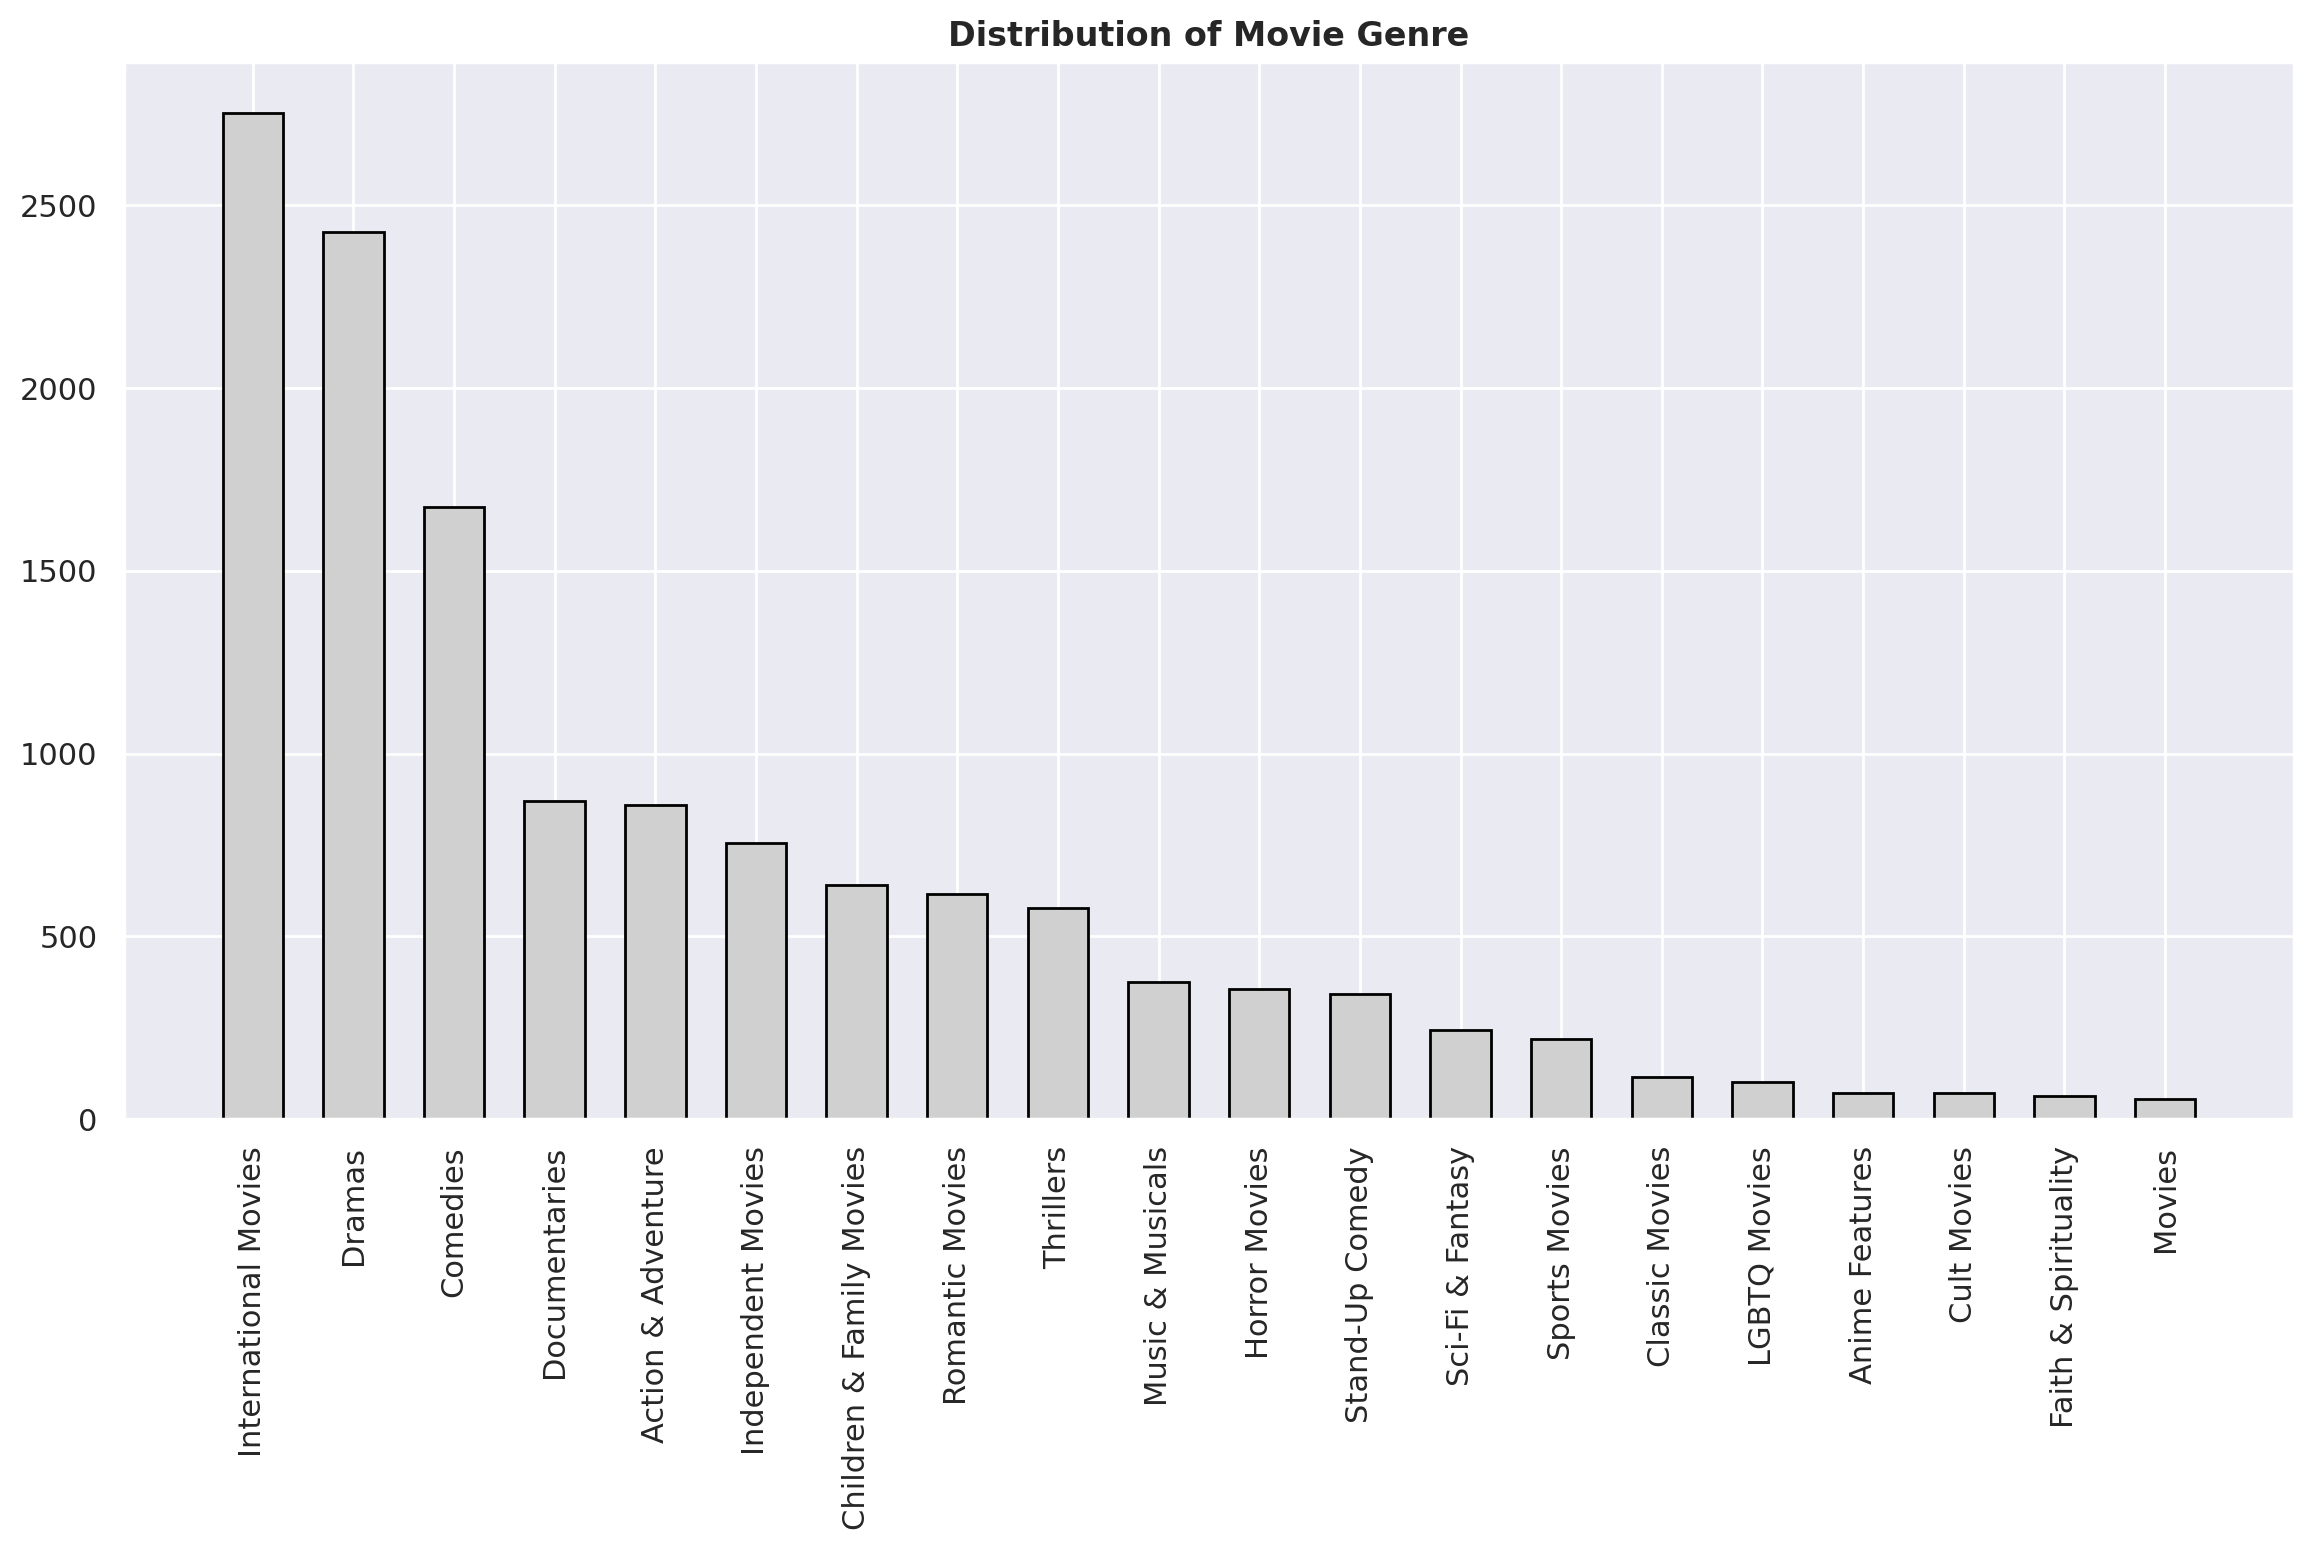

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(14, 7), dpi=200)
plt.xticks(rotation = 90)
ax.bar(movie_gen.index, movie_gen, color="#d0d0d0", width=0.6, edgecolor='black')
ax.set_title(f'Distribution of Movie Genre', fontweight='bold')
plt.show()

In [20]:
# tv 장르별 컨텐츠 수
tv_gen = tv_dur_genre['listed_in'].value_counts()
tv_gen

International TV Shows          1351
TV Dramas                        763
TV Comedies                      581
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Romantic TV Shows                370
Reality TV                       255
British TV Shows                 253
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows                  151
TV Mysteries                      98
Science & Nature TV               92
TV Sci-Fi & Fantasy               84
TV Horror                         75
Teen TV Shows                     69
TV Thrillers                      57
Stand-Up Comedy & Talk Shows      56
Classic & Cult TV                 28
TV Shows                          16
Name: listed_in, dtype: int64

movie = 20, tv = 22개

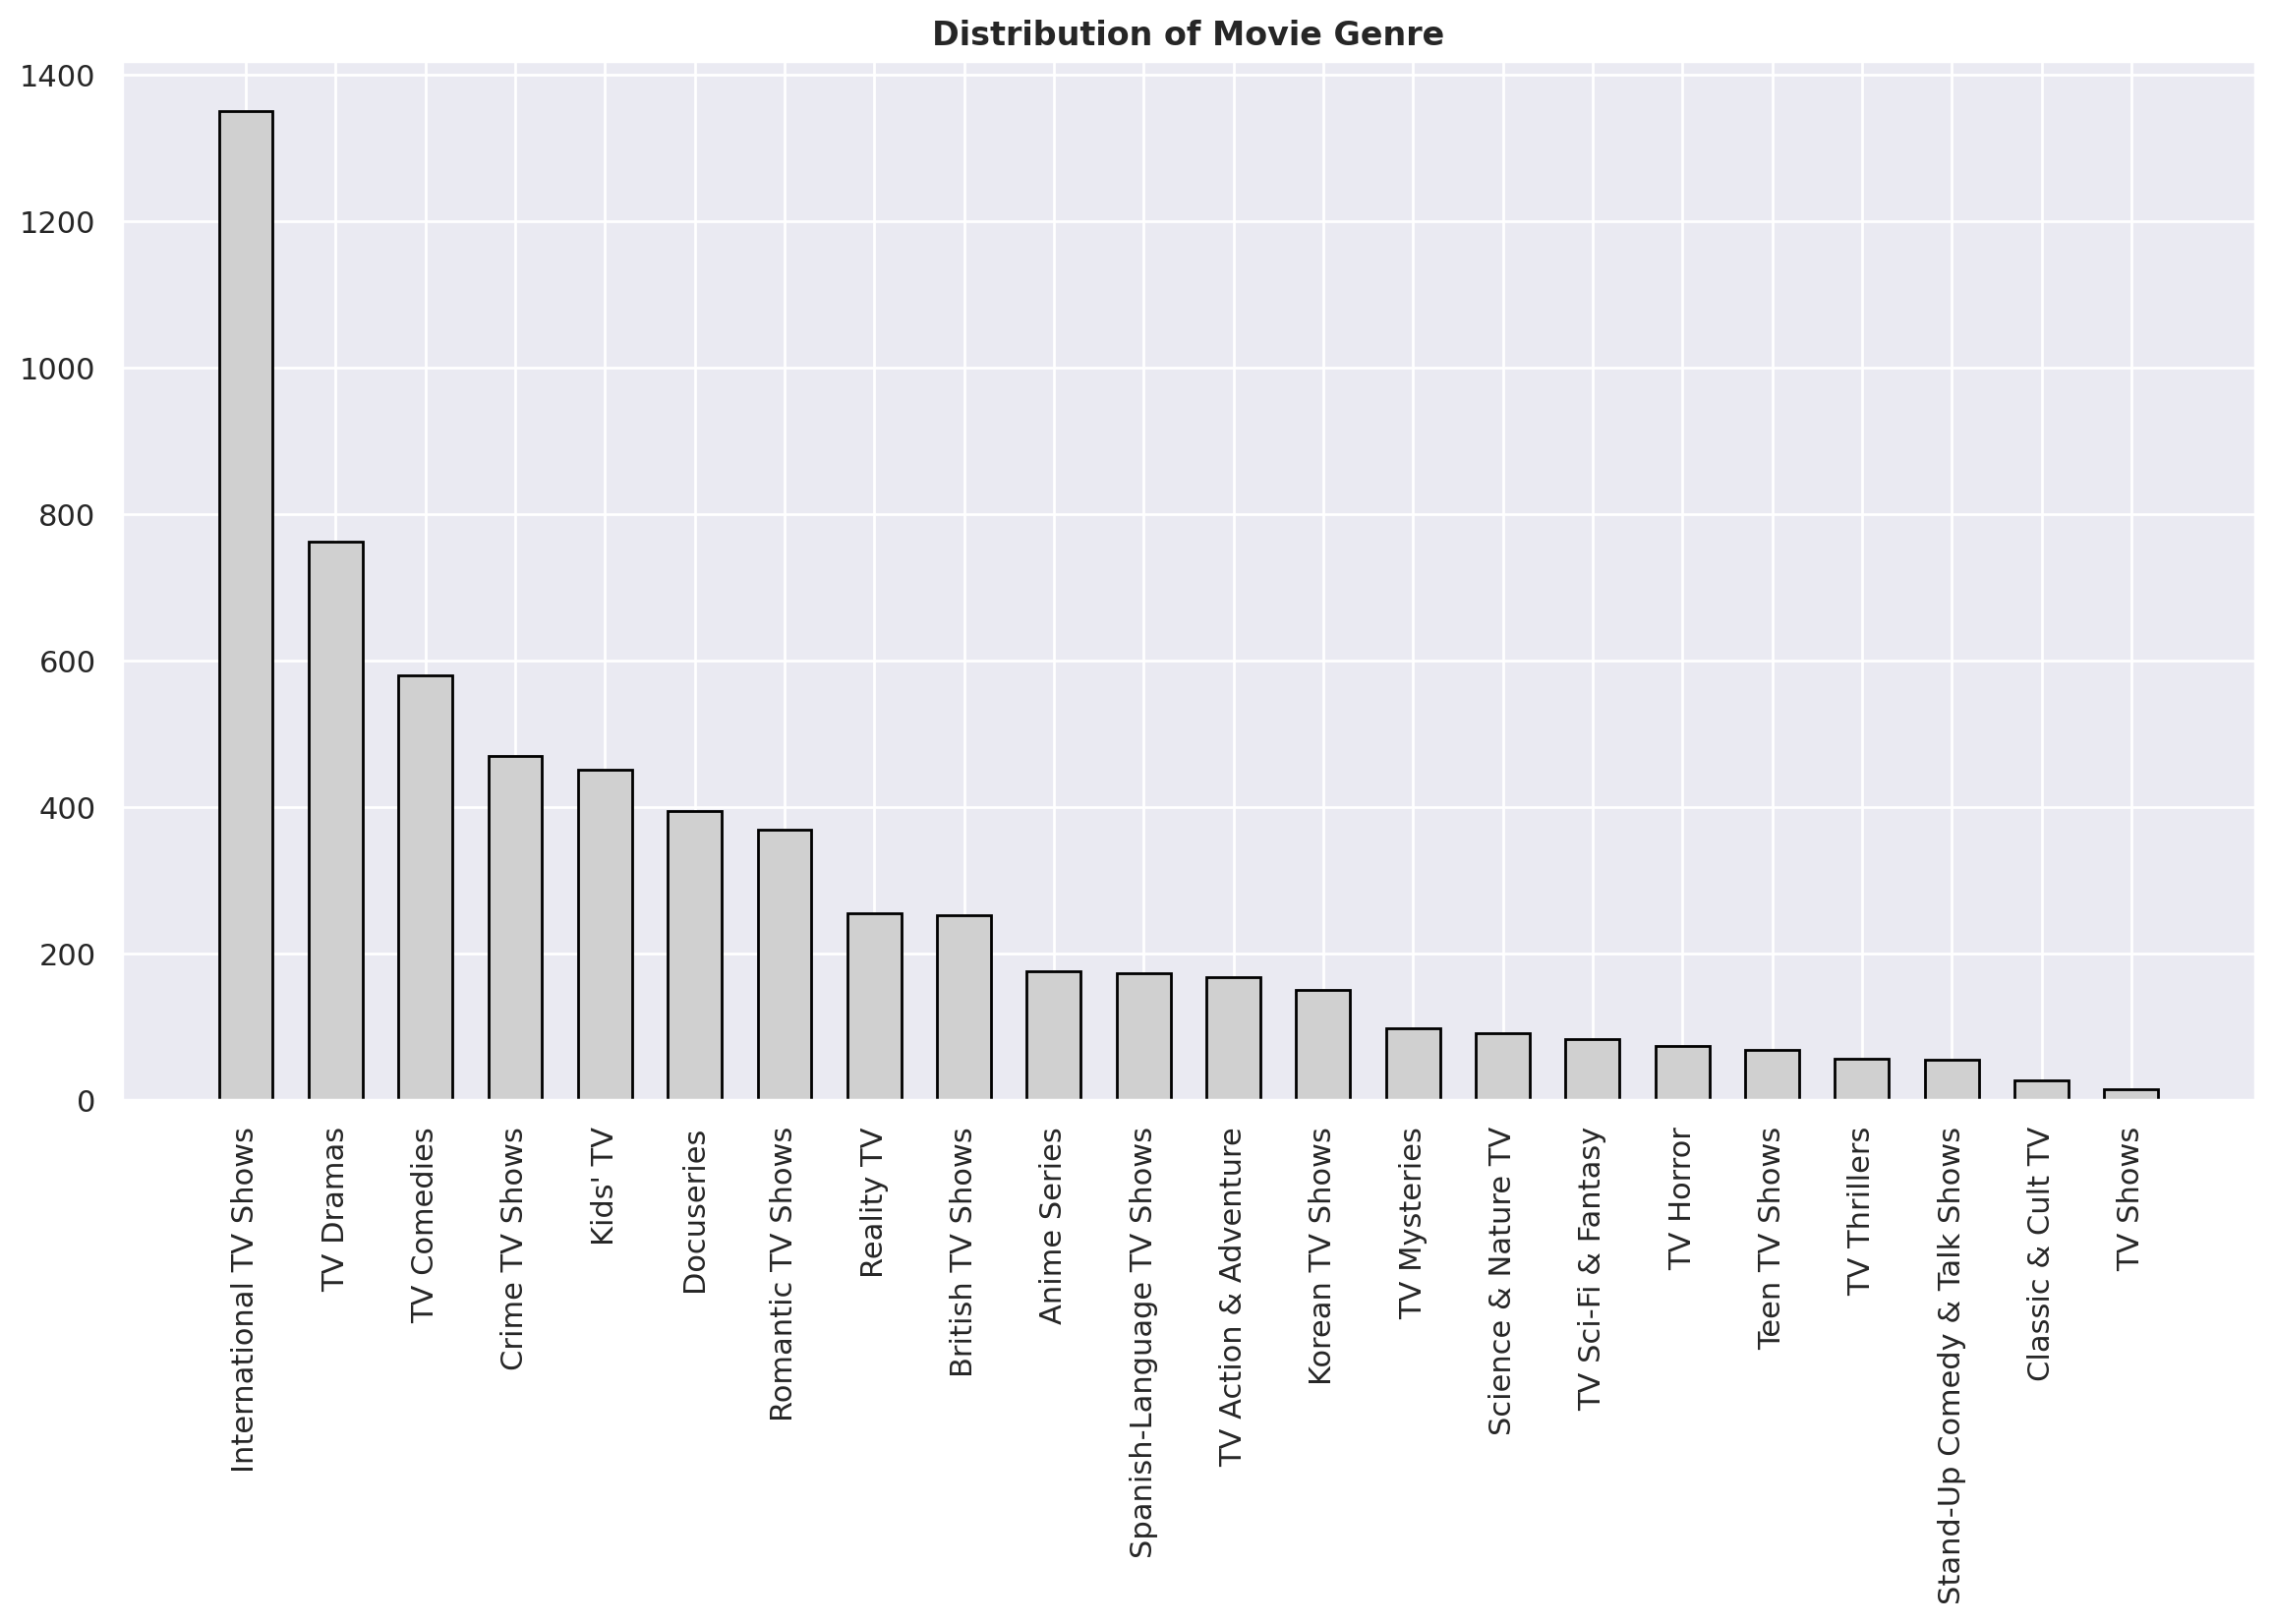

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(14, 7), dpi=200)
plt.xticks(rotation = 90)
ax.bar(tv_gen.index, tv_gen, color="#d0d0d0", width=0.6, edgecolor='black')
ax.set_title(f'Distribution of Movie Genre', fontweight='bold')
plt.show()

### 장르별 러닝타임 분포 (movie)
### 장르별 시리즈 분포 (TV Show)

- movie에서의 장르별 러닝타임(min) 분포를 알아보자